In [1]:
#import relevant packages
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

Using TensorFlow backend.


In [2]:
!wget https://www.dropbox.com/s/8yq0edd4q908xqw/airline_sentiment.csv?dl=1

--2019-02-27 06:12:22--  https://www.dropbox.com/s/8yq0edd4q908xqw/airline_sentiment.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8yq0edd4q908xqw/airline_sentiment.csv [following]
--2019-02-27 06:12:22--  https://www.dropbox.com/s/dl/8yq0edd4q908xqw/airline_sentiment.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce0141764994f5074f72c6de0c5.dl.dropboxusercontent.com/cd/0/get/AcHSCltBGrhxPTCTZiy4gdjzY0ju2DIDvZk9L3CWU9URbQHkBreAj5lMk4isxTEEKpdwMDmiYnoVMvJtV5l1WoSg910VfOCq21GWGWh99fwl8WDyjlnvj5Zc4VCu7tinxC4/file?dl=1# [following]
--2019-02-27 06:12:23--  https://uce0141764994f5074f72c6de0c5.dl.dropboxusercontent.com/cd/0/get/AcHSCltBGrhxPTCTZiy4gdjzY0ju2DIDvZk9L3CWU9URbQHkBreAj5lMk4isxTEEKpdwMDmiYnoVMvJtV5l1W

In [3]:
!ls

'airline_sentiment.csv?dl=1'   sample_data


In [5]:
t=pd.read_csv('/content/airline_sentiment.csv?dl=1')
t.head()

,airline_sentiment,text
0,1,@VirginAmerica plus you've added commercials t...
1,0,@VirginAmerica it's really aggressive to blast...
2,0,@VirginAmerica and it's a really big bad thing...
3,0,@VirginAmerica seriously would pay $30 a fligh...
4,1,"@VirginAmerica yes, nearly every time I fly VX..."


In [6]:
import nltk
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def preprocess(text):
    text=text.lower()
    text=re.sub('[^0-9a-zA-Z]+',' ',text)
    words = text.split()
    words2=[w for w in words if (w not in stop)]
    #words3=[ps.stem(w) for w in words]
    words4=' '.join(words2)
    return(words4)

In [0]:
t['text'] = t['text'].apply(preprocess)

In [0]:
from collections import Counter
counts = Counter()
for i,review in enumerate(t['text']):
    counts.update(review.split())

In [10]:
words = sorted(counts, key=counts.get, reverse=True)
words[0:10]

['united',
 'flight',
 'usairways',
 'americanair',
 'southwestair',
 'jetblue',
 'get',
 'cancelled',
 'thanks',
 'service']

In [11]:
chars = words
nb_chars = len(words)
nb_chars

12532

In [0]:
word_to_int = {word: i for i, word in enumerate(words, 1)}
int_to_word = {i: word for i, word in enumerate(words, 1)}

In [0]:
int_to_word

In [0]:
mapped_reviews = []
for review in t['text']:
    mapped_reviews.append([word_to_int[word] for word in review.split()])

In [17]:
print('Original text:',t.loc[0]['text'])
print('Mapped text:',mapped_reviews[0])

('Original text:', 'virginamerica plus added commercials experience tacky')
('Mapped text:', [44, 459, 1198, 2482, 100, 9958])


In [18]:
t.loc[0:1]['text']

0    virginamerica plus added commercials experienc...
1    virginamerica really aggressive blast obnoxiou...
Name: text, dtype: object

In [19]:
mapped_reviews[0:2]

[[44, 459, 1198, 2482, 100, 9958],
 [44, 57, 3111, 4323, 4791, 831, 3445, 5090, 20, 371, 2457]]

In [20]:
length_sent = []
for i in range(len(mapped_reviews)):
  length_sent.append(len(mapped_reviews[i]))
max(length_sent)

26

In [0]:
sequence_length = max(length_sent)
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(maxlen=sequence_length, sequences=mapped_reviews, padding="post", value=0)

In [22]:
X.shape

(11541, 26)

In [0]:
y=t['airline_sentiment'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=10)
y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [30]:
embedding_vecor_length=32
max_review_length=26
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(SimpleRNN(40, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 32)            401056    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 40)                2920      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 82        
Total params: 404,058
Trainable params: 404,058
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
12533*32

401056

In [32]:
(32+40)*40+40

2920

In [33]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=32)

Train on 8078 samples, validate on 3463 samples
Epoch 1/10
8078/8078 [==============================] - 3s 408us/step - loss: 0.3510 - acc: 0.8557 - val_loss: 0.2750 - val_acc: 0.8906
Epoch 2/10
8078/8078 [==============================] - 3s 340us/step - loss: 0.1408 - acc: 0.9511 - val_loss: 0.2780 - val_acc: 0.8989
Epoch 3/10
8078/8078 [==============================] - 3s 334us/step - loss: 0.0476 - acc: 0.9848 - val_loss: 0.3681 - val_acc: 0.8937
Epoch 4/10
8078/8078 [==============================] - 2s 301us/step - loss: 0.0192 - acc: 0.9949 - val_loss: 0.4388 - val_acc: 0.8900
Epoch 5/10
8078/8078 [==============================] - 2s 282us/step - loss: 0.0095 - acc: 0.9981 - val_loss: 0.4780 - val_acc: 0.8880
Epoch 6/10
8078/8078 [==============================] - 3s 333us/step - loss: 0.0110 - acc: 0.9972 - val_loss: 0.4537 - val_acc: 0.8868
Epoch 7/10
8078/8078 [==============================] - 3s 355us/step - loss: 0.0089 - acc: 0.9969 - val_loss: 0.4820 - val_acc: 0.8877


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


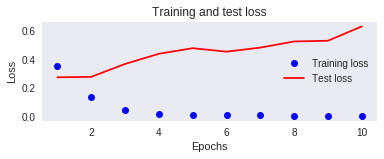

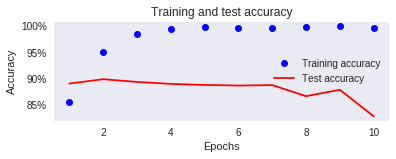

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Sentiment classification using LSTM

In [0]:
from keras.layers import LSTM

In [36]:
embedding_vecor_length=32
max_review_length=26
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(LSTM(40, return_sequences=False))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 26, 32)            401056    
_________________________________________________________________
lstm_1 (LSTM)                (None, 40)                11680     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 82        
Total params: 412,818
Trainable params: 412,818
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
W = model.layers[1].get_weights()[0]
U = model.layers[1].get_weights()[1]
b = model.layers[1].get_weights()[2]
print(W.shape,U.shape,b.shape)

((32, 160), (40, 160), (160,))


In [0]:
units = 40
W_i = W[:, :units]
W_f = W[:, units: units * 2]
W_c = W[:, units * 2: units * 3]
W_o = W[:, units * 3:]

U_i = U[:, :units]
U_f = U[:, units: units * 2]
U_c = U[:, units * 2: units * 3]
U_o = U[:, units * 3:]

b_i = b[:units]
b_f = b[units: units * 2]
b_c = b[units * 2: units * 3]
b_o = b[units * 3:]

In [39]:
W.shape

(32, 160)

In [40]:
73*160

11680

In [41]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=32)

Train on 8078 samples, validate on 3463 samples
Epoch 1/10
8078/8078 [==============================] - 7s 846us/step - loss: 0.4206 - acc: 0.8300 - val_loss: 0.2294 - val_acc: 0.9076
Epoch 2/10
8078/8078 [==============================] - 6s 704us/step - loss: 0.1601 - acc: 0.9410 - val_loss: 0.2091 - val_acc: 0.9220
Epoch 3/10
8078/8078 [==============================] - 6s 723us/step - loss: 0.0898 - acc: 0.9694 - val_loss: 0.2126 - val_acc: 0.9111
Epoch 4/10
8078/8078 [==============================] - 6s 729us/step - loss: 0.0532 - acc: 0.9835 - val_loss: 0.2873 - val_acc: 0.9125
Epoch 5/10
8078/8078 [==============================] - 6s 713us/step - loss: 0.0317 - acc: 0.9911 - val_loss: 0.3744 - val_acc: 0.9070
Epoch 6/10
8078/8078 [==============================] - 6s 789us/step - loss: 0.0216 - acc: 0.9946 - val_loss: 0.4088 - val_acc: 0.9012
Epoch 7/10
8078/8078 [==============================] - 5s 667us/step - loss: 0.0200 - acc: 0.9953 - val_loss: 0.3917 - val_acc: 0.9064


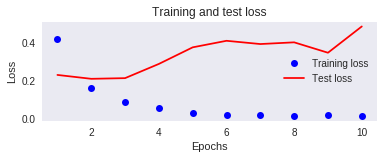

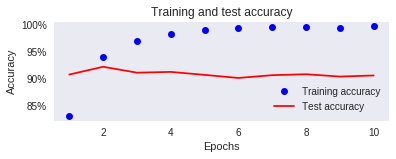

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Sentiment classification using stacked LSTM

In [43]:
embedding_vecor_length=32
max_review_length=26
model = Sequential()
model.add(Embedding(input_dim=12533, output_dim=32, input_length = 26))
model.add(LSTM(40, return_sequences=True,name='lstm1'))
model.add(LSTM(40, return_sequences=False,name='lstm2'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 26, 32)            401056    
_________________________________________________________________
lstm1 (LSTM)                 (None, 26, 40)            11680     
_________________________________________________________________
lstm2 (LSTM)                 (None, 40)                12960     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 82        
Total params: 425,778
Trainable params: 425,778
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
X_train[0].shape

(26,)

In [45]:
from keras.models import Model

XX = model.input 
YY = model.layers[1].output
new_model = Model(XX, YY)
Xresult = new_model.predict(X_train[0].reshape(1,26))
Xresult.shape

(1, 26, 40)

In [46]:
model.get_layer("lstm1").output

<tf.Tensor 'lstm1/transpose_1:0' shape=(?, ?, 40) dtype=float32>

In [48]:
W = model.layers[2].get_weights()[0]
U = model.layers[2].get_weights()[1]
b = model.layers[2].get_weights()[2]
print(W.shape,U.shape,b.shape)

((40, 160), (40, 160), (160,))


In [49]:
history = model.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=10, batch_size=32)

Train on 8078 samples, validate on 3463 samples
Epoch 1/10
8078/8078 [==============================] - 12s 2ms/step - loss: 0.3787 - acc: 0.8498 - val_loss: 0.2181 - val_acc: 0.9131
Epoch 2/10
8078/8078 [==============================] - 11s 1ms/step - loss: 0.1472 - acc: 0.9487 - val_loss: 0.2127 - val_acc: 0.9180
Epoch 3/10
8078/8078 [==============================] - 11s 1ms/step - loss: 0.0872 - acc: 0.9708 - val_loss: 0.2555 - val_acc: 0.9157
Epoch 4/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.0544 - acc: 0.9824 - val_loss: 0.2655 - val_acc: 0.9093
Epoch 5/10
8078/8078 [==============================] - 10s 1ms/step - loss: 0.0365 - acc: 0.9894 - val_loss: 0.3109 - val_acc: 0.9099
Epoch 6/10
8078/8078 [==============================] - 11s 1ms/step - loss: 0.0270 - acc: 0.9922 - val_loss: 0.3401 - val_acc: 0.9062
Epoch 7/10
8078/8078 [==============================] - 11s 1ms/step - loss: 0.0188 - acc: 0.9953 - val_loss: 0.4535 - val_acc: 0.9021
Epoch 8

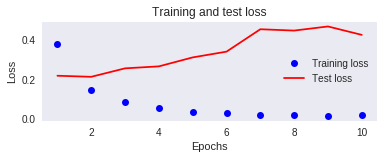

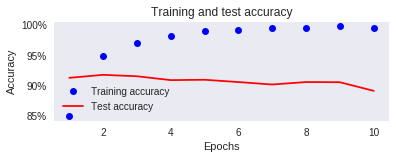

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()